Let's take a look at the world 

You should consider upgrading via the '/Users/shobhavijay/training/plaidml-venv/bin/python3 -m pip install --upgrade pip' command.


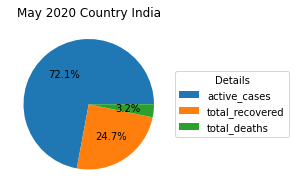

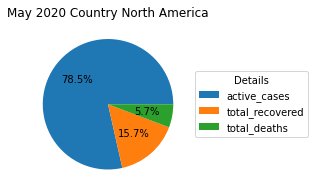

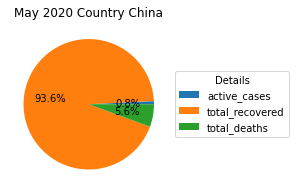

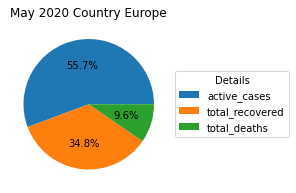

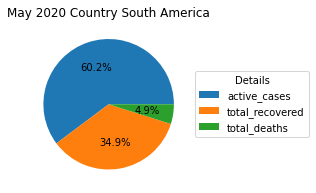

In [10]:
!pip install seaborn
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
import numpy as np
import pandas as pd

data_files = { 1 : "worldometer-confirmed-cases-and-deaths-by-country-territory-or-conveyance.csv",
               2 : "apple_mobility_trends/mobility-trends.csv" }

data_path="/worldometer/worldometer-confirmed-cases-and-deaths-by-country-territory-or-conveyance.csv"

df_mobility_tr1 = pd.read_csv(data_path)

df_mobility_tr1.dropna()

#delete last 8 rows as we do not need totals for our processing
df_mobility_tr1 = df_mobility_tr1[:-8]
#print(df_mobility_tr1.head())

df_mobility_tr2 = df_mobility_tr1.iloc[:,[0,1,2,3,4,5,6]]

#print(df_mobility_tr2.tail())

df_mobility_tr2.set_index("country",inplace=True)


#specific counteries of interest
cty_list = ['India','North America','China','Europe', 'South America']

df_mobility_tr = df_mobility_tr2.loc[['India','North America','China','Europe', 'South America']]

#print(df_mobility_tr.tail())

df_ctry = df_mobility_tr.iloc[:,0]

#print("Country list = ", df_mobility_tr['country'].tolist())

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

df_ctry_data = df_mobility_tr.iloc[:,[0,5,4,2]]
for i in range(len(cty_list)):
    df1 = df_mobility_tr.iloc[:,[5,4,2]]
    col_list = df1.columns.values.tolist()
    df1_cty = df1.iloc[i]
    #Display the graph for nations
    fig, ax = plt.subplots(figsize=(6,3))
    wedges, texts, autotexts = ax.pie(df1_cty, autopct=lambda pct: func(pct, df1_cty))
                                      #textprops=dict(color="w"))

    ax.legend(wedges, col_list,
                  title="Details",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

    title = "May 2020 Country " + cty_list[i]
    ax.set_title(title)
    plt.show()



In [ ]:
!pip install seaborn
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
import folium as f
import numpy as np
import pandas as pd
import os
import seaborn as sns

pd.__version__
data_path="/worldometer/worldometer-confirmed-cases-and-deaths-by-country-territory-or-conveyance.csv"
#print(data_path)

df_mobility_tr1 = pd.read_csv(data_path)
df_mobility_tr = df_mobility_tr1.iloc[:-8]



print("Length befoe na ", len(df_mobility_tr))
df_mobility_tr.dropna()
print("Len after na", len(df_mobility_tr))


df_data = df_mobility_tr.iloc[:,[1,6,5,3]]

print(df_mobility_tr.describe())

print(df_mobility_tr.head())

df_ctry = df_mobility_tr.iloc[:,0]

ctry_list = df_ctry.values.tolist()

mean = int(df_mobility_tr['total_cases'].mean())
print(max(df_mobility_tr['total_cases']))
sns.pairplot(df_data)
#sns.scatterplot(x='total_cases',y='active_cases',size="total_deaths",data=df_mobility_tr[['total_cases','active_cases','total_deaths']])

# The goal of this notebook is to present top level data visualizations of covid data present primarily from UNCOVER covid data and few interesting deeper insights

**Let us import some python libraries to get data loaded and basic visualations sketced out

In [3]:
!pip install seaborn
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns

**Start with loading the data and get a sense of ranges of COVID positive cases for various counties of New York state.

In [4]:
#data_path="/Users/shobhavijay/Downloads/582631_1175383_compressed_UNCOVER/ny_dept_of_health/new-york-state-statewide-covid-19-testing.csv"
df_ny_statewide = pd.read_csv(data_path)

df_ny_statewide.head()


num_of_counties = df_ny_statewide.county.unique()
print("Let's find out the counties in NY state")
print(num_of_counties)

df_ny_statewide.sort_values(['county','test_date'],axis=0, ascending=['True','False'],inplace=True)
df_ny_statewide['date'] = pd.to_datetime(df_ny_statewide['test_date']).dt.strftime('%y-%m-%d')

Let's find out the counties in NY state
['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


Let's look at NY counties and view the density of the spread

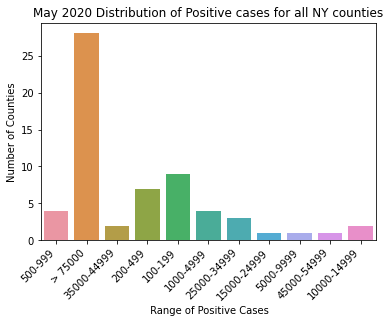

Postive Cases   Number of NY Counties
> 75000        28
100-199         9
200-499         7
1000-4999       4
500-999         4
25000-34999     3
35000-44999     2
10000-14999     2
15000-24999     1
5000-9999       1
45000-54999     1
Name: Total_Positive_Cases, dtype: int64


In [12]:
df_ny_statewide.reset_index()
df_ny_grp = df_ny_statewide.groupby(['county'])
sev_ct = []

for i in num_of_counties:
    t_Df=df_ny_grp.get_group(i)['cumulative_number_of_positives']
    if t_Df.iloc[-1]>=100 and t_Df.iloc[-1] < 200:
        sev_ct.append("100-199")
    elif t_Df.iloc[-1]>=200 and t_Df.iloc[-1] < 500:
        sev_ct.append("200-499")
    elif t_Df.iloc[-1]>=500 and t_Df.iloc[-1] < 1000:
        sev_ct.append("500-999")    
    elif t_Df.iloc[-1]>=1000 and t_Df.iloc[-1] < 5000:
        sev_ct.append("1000-4999")
    elif t_Df.iloc[-1]>=5000 and t_Df.iloc[-1] < 10000:
        sev_ct.append("5000-9999")
    elif t_Df.iloc[-1]>=10000 and t_Df.iloc[-1] < 15000:
        sev_ct.append("10000-14999")
    elif t_Df.iloc[-1]>=15000 and t_Df.iloc[-1] < 25000:
        sev_ct.append("15000-24999")
    elif t_Df.iloc[-1]>=25000 and t_Df.iloc[-1] < 35000:
        sev_ct.append("25000-34999")
    elif t_Df.iloc[-1]>=35000 and t_Df.iloc[-1] < 45000:
        sev_ct.append("35000-44999") 
    elif t_Df.iloc[-1]>=45000 and t_Df.iloc[-1] < 55000:
        sev_ct.append("45000-54999") 
    elif t_Df.iloc[-1]>=55000 and t_Df.iloc[-1] < 64999:
        sev_ct.append("55000-64999") 
    elif t_Df.iloc[-1]>=65000 and t_Df.iloc[-1] < 74999:
        sev_ct.append("65000-74999")     
    else:
        sev_ct.append("> 75000")
        
    
metrics_col = ['County','Total_Positive_Cases']

df2 = pd.DataFrame(columns = metrics_col)
df2['County'] = num_of_counties

for i in range(len(num_of_counties)):
    df2['Total_Positive_Cases'].loc[i] = sev_ct[i]

   
ax = sns.countplot(x="Total_Positive_Cases",data=df2)
ax.set(xlabel = " Range of Positive Cases", ylabel = "Number of Counties")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
) 

plt.title("May 2020 Distribution of Positive cases for all NY counties")
plt.show()


print("Postive Cases   Number of NY Counties")
print(df2['Total_Positive_Cases'].value_counts())

Let's list the counties in NY where the total positive cases are greater than 75000 in the month of May

         County Total_Positive_Cases
1      Allegany              > 75000
4   Cattaraugus              > 75000
5        Cayuga              > 75000
6    Chautauqua              > 75000
8      Chenango              > 75000
9       Clinton              > 75000
11     Cortland              > 75000
12     Delaware              > 75000
15        Essex              > 75000
16     Franklin              > 75000
17       Fulton              > 75000
20     Hamilton              > 75000
21     Herkimer              > 75000
22    Jefferson              > 75000
24        Lewis              > 75000
25   Livingston              > 75000
28   Montgomery              > 75000
34      Ontario              > 75000
36      Orleans              > 75000
37       Oswego              > 75000
38       Otsego              > 75000
46    Schoharie              > 75000
47     Schuyler              > 75000
48       Seneca              > 75000
53        Tioga              > 75000
58        Wayne              > 75000
6

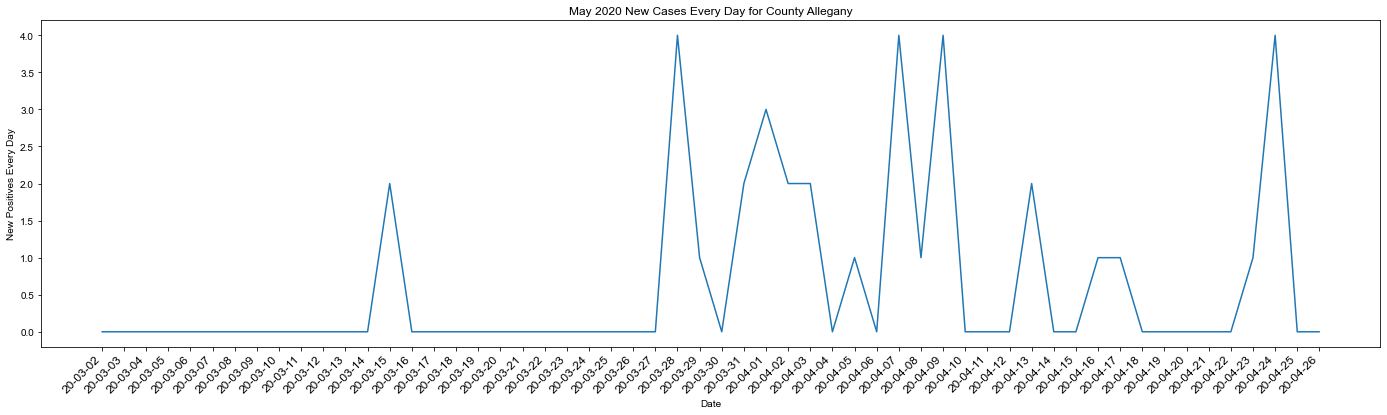

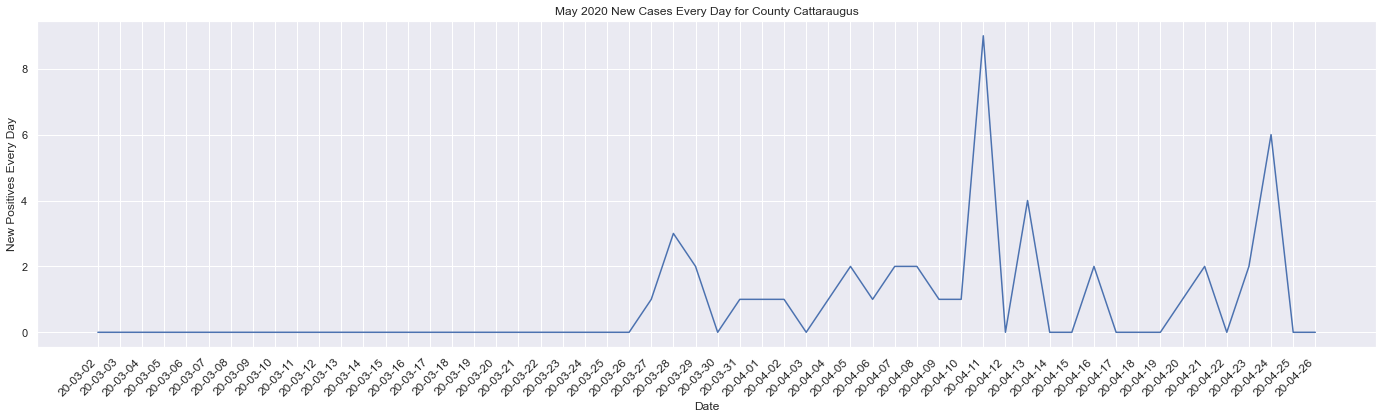

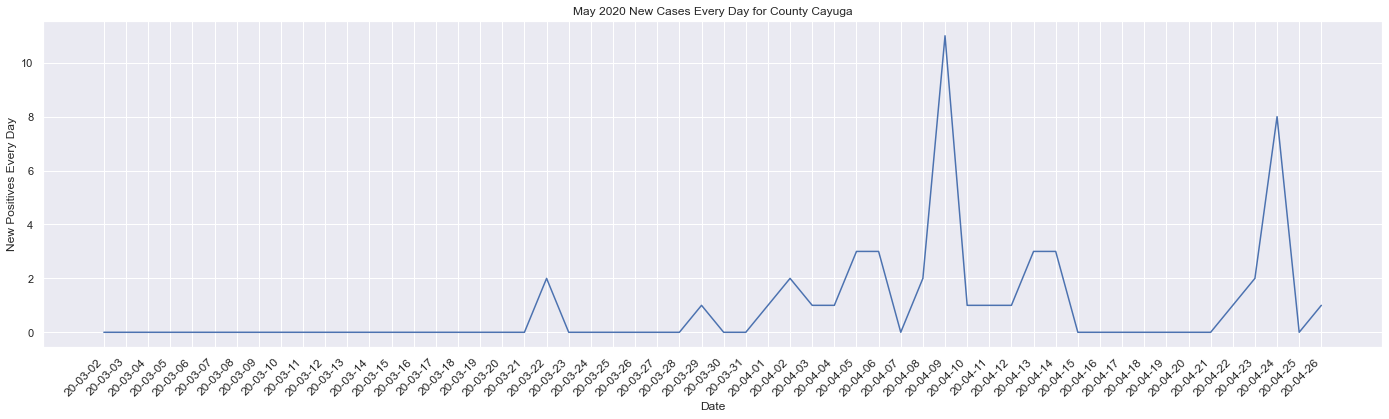

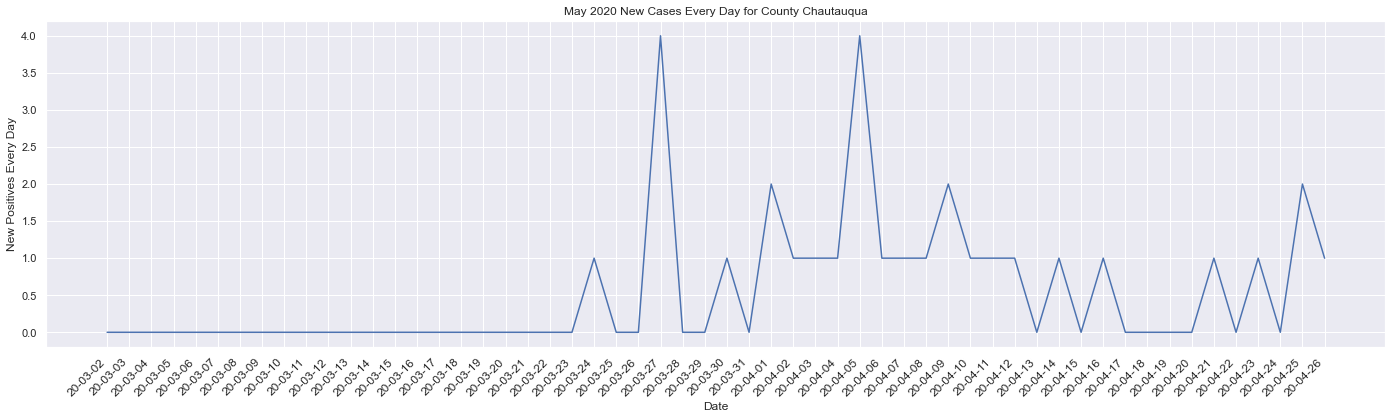

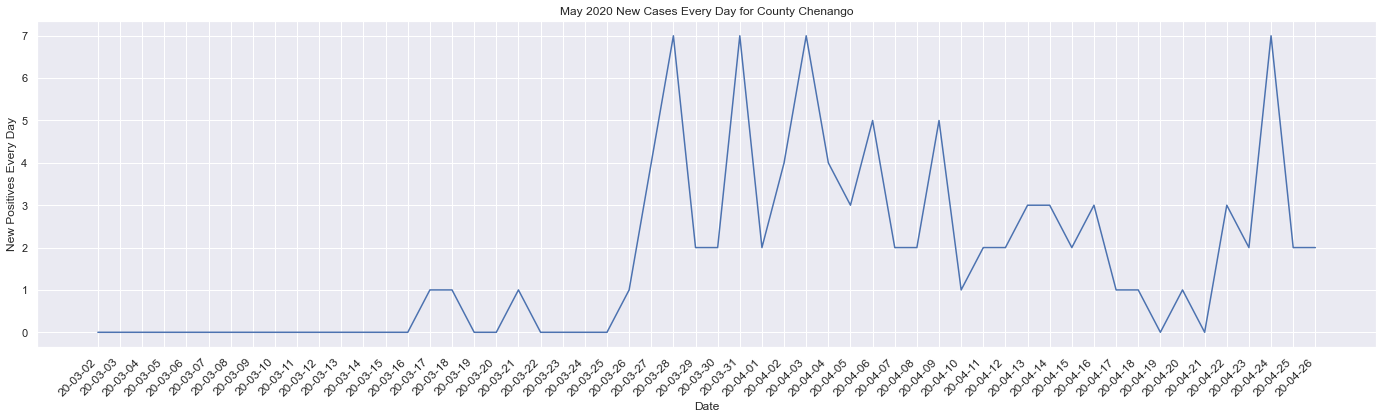

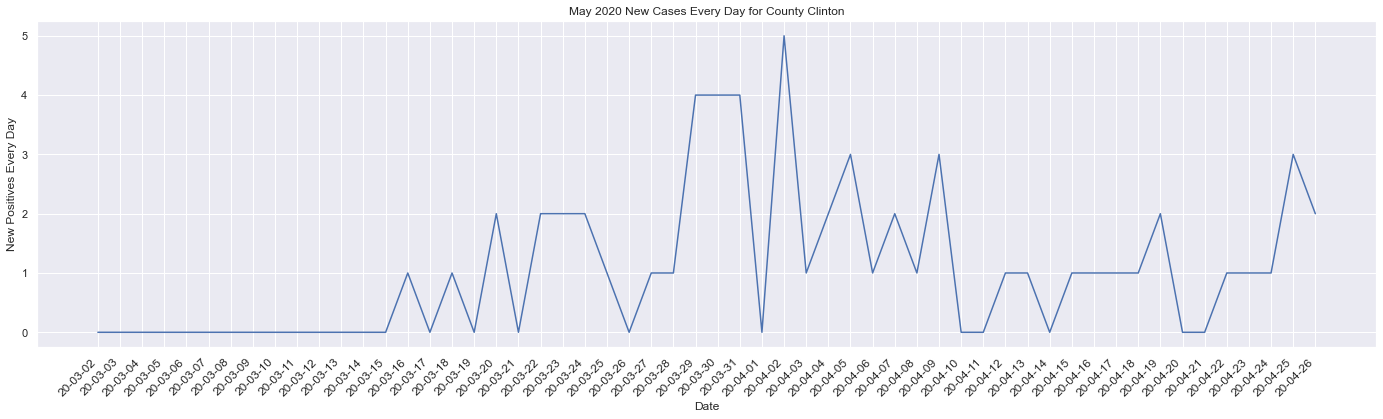

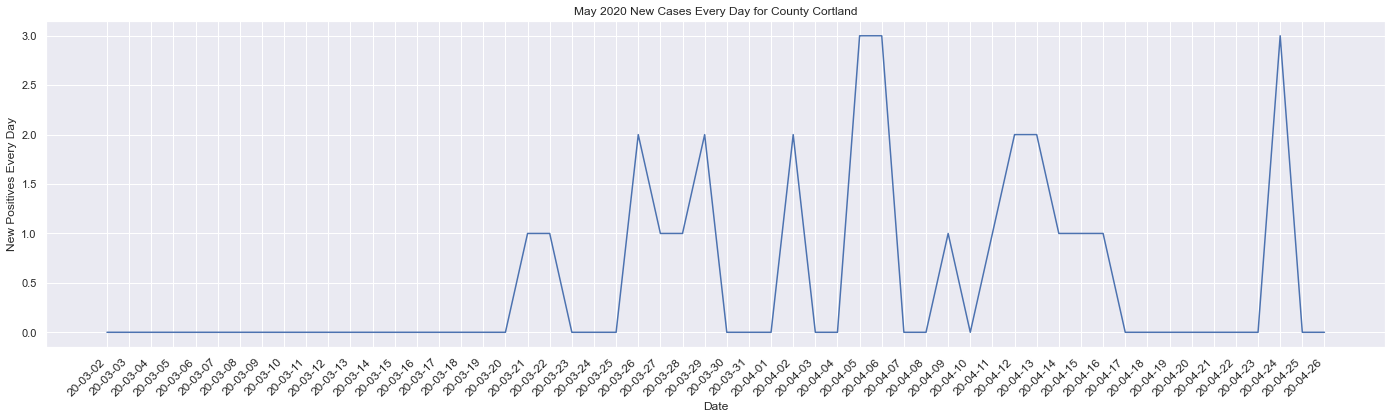

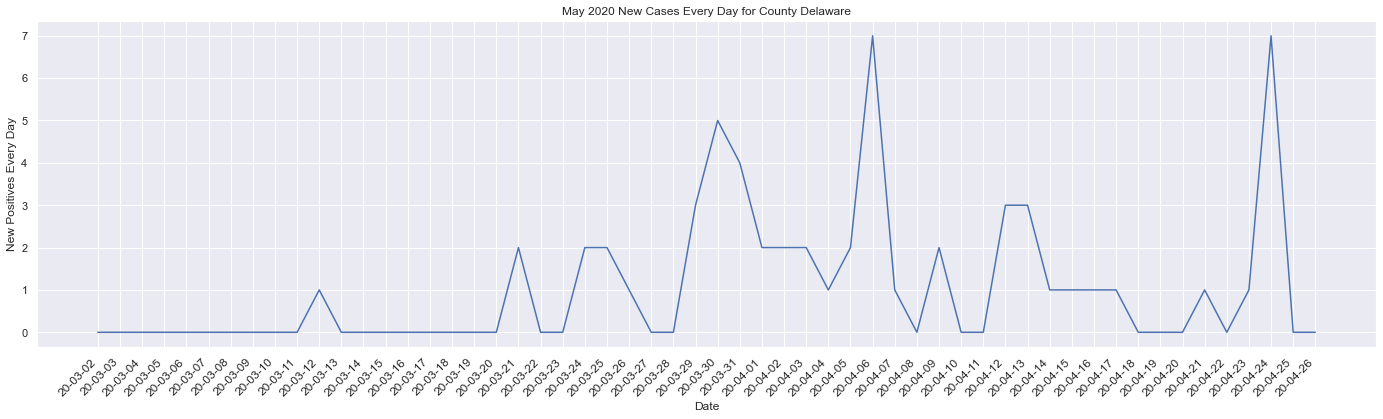

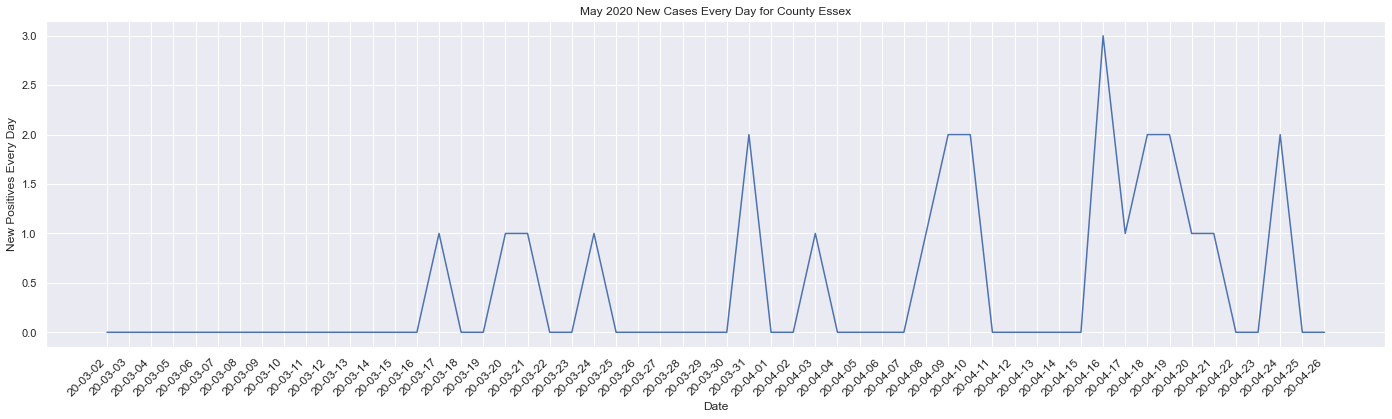

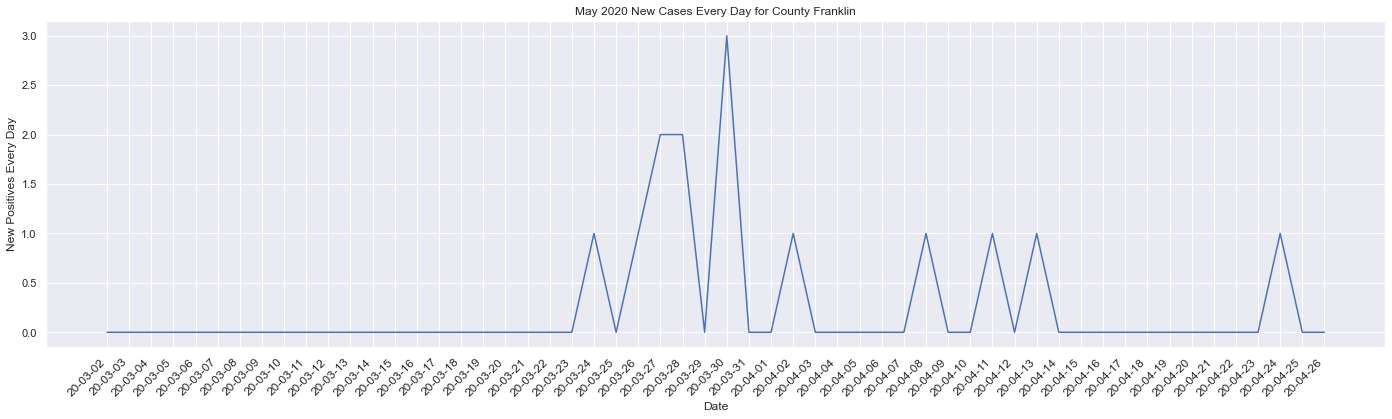

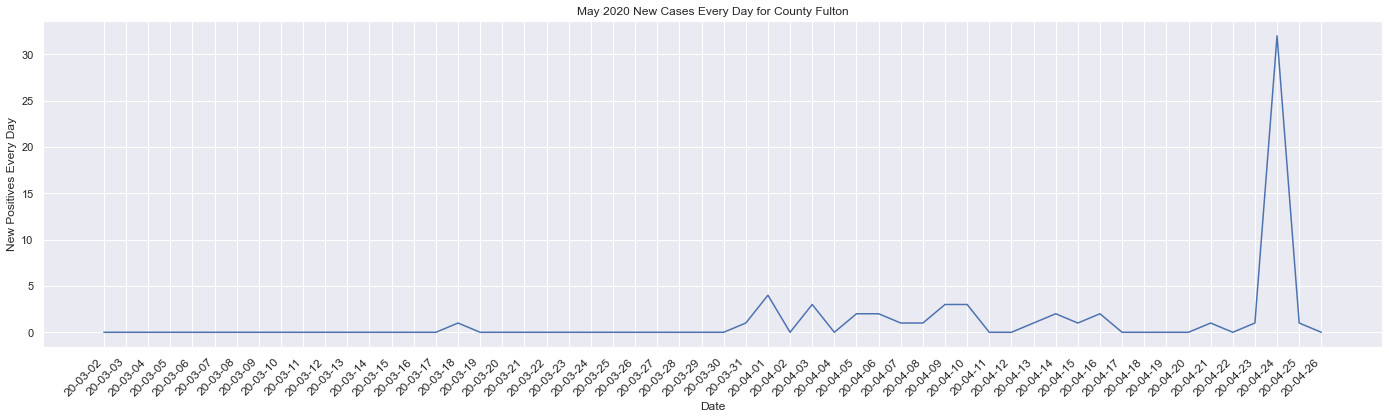

In [13]:

print(df2.loc[df2['Total_Positive_Cases'] == '> 75000'])
df3 = df2.loc[df2['Total_Positive_Cases'] == '> 75000',['County']]
#df3.head()
cty_list = df3['County'].values.tolist()
#print(len(cty_list))
ct = 0
for i in cty_list:
        if ct > 10:
            break
        ct = ct +1    
        df3 = df_ny_grp.get_group(i)
        fig = plt.figure(figsize=(24,6))
        ct_name = "May 2020 New Cases Every Day for County " + str(i)
        plt.title(ct_name)
        sns.set(font_scale=1)
        ##ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        
        ax = sns.lineplot(x='date',y='new_positives',data=df3)
        ax.set(xlabel = "Date", ylabel = "New Positives Every Day")
        plt.xticks(
            rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='medium'  
        )
        plt.show()